In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import math


In [8]:

path = '../data/'

In [9]:
def concat_csv(path): # получает путь до файла
    all_csv = [path + i for i in os.listdir(path) if ".csv" in i]
    start_data = pd.read_csv(all_csv[0])
    for csv in all_csv[1:]:
        table = pd.read_csv(csv)
        start_data = pd.concat([start_data, table],  axis = 0)
    start_data.to_csv(path+'processed.csv', index = False)
    return start_data

In [10]:
data = concat_csv(path)

(271115, 15)

В объединенном датасете есть дупликаты - 1385 штук, удалим их

In [6]:
duplicates = data.duplicated()

In [7]:
idx_duplicates = duplicates[duplicates == True].index

In [8]:
data = data.drop(idx_duplicates)

In [9]:
data.shape

(255007, 15)

In [12]:
any(data.duplicated())  #теперь нет дубликатов

False

Пока не понимаю чем отличаются колонки Team и NOC

In [17]:
noc_na_index = data['NOC'].isna()[data['NOC'].isna()].index

In [18]:
noc_na_index

Int64Index([22409, 22463, 22642, 22557], dtype='int64')

In [19]:
data.drop(noc_na_index, inplace=True)   # удалим строки где нет страны, их всего 4

In [20]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN


In [21]:
set(data.NOC)   # все выступающие страны

{'AFG',
 'AHO',
 'ALB',
 'ALG',
 'AND',
 'ANG',
 'ANT',
 'ANZ',
 'ARG',
 'ARM',
 'ARU',
 'ASA',
 'AUS',
 'AUT',
 'AZE',
 'BAH',
 'BAN',
 'BAR',
 'BDI',
 'BEL',
 'BEN',
 'BER',
 'BHU',
 'BIH',
 'BIZ',
 'BLR',
 'BOH',
 'BOL',
 'BOT',
 'BRA',
 'BRN',
 'BRU',
 'BUL',
 'BUR',
 'CAF',
 'CAM',
 'CAN',
 'CAY',
 'CGO',
 'CHA',
 'CHI',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRC',
 'CRO',
 'CRT',
 'CUB',
 'CYP',
 'CZE',
 'DEN',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'ERI',
 'ESA',
 'ESP',
 'EST',
 'ETH',
 'EUN',
 'FIJ',
 'FIN',
 'FRA',
 'FRG',
 'FSM',
 'GAB',
 'GAM',
 'GBR',
 'GBS',
 'GDR',
 'GEO',
 'GEQ',
 'GER',
 'GHA',
 'GRE',
 'GRN',
 'GUA',
 'GUI',
 'GUM',
 'GUY',
 'HAI',
 'HKG',
 'HON',
 'HUN',
 'INA',
 'IND',
 'IOA',
 'IRI',
 'IRL',
 'IRQ',
 'ISL',
 'ISR',
 'ISV',
 'ITA',
 'IVB',
 'JAM',
 'JOR',
 'JP',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KIR',
 'KOR',
 'KOS',
 'KSA',
 'KUW',
 'LAO',
 'LAT',
 'LBA',
 'LBR',
 'LCA',
 'LES',
 'LIB',
 'LIE',
 'LTU',
 'LUX',
 'MAD',
 

In [22]:
idx = list(np.where(data['NOC'] == 'USA')[0])

Видимо NOC представляет национальные команды, а Team - что-то более локальное

In [23]:
data.iloc[idx, 6].value_counts()    # видно что

United States            17847
United States-1            277
United States-2            277
United States-3             46
Vesper Boat Club            18
                         ...  
Formosa                      1
BLO Polo Club, Rugby         1
Brentina                     1
A North American Team        1
United States/France         1
Name: Team, Length: 97, dtype: int64

In [24]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN


###### заметим что в строчках есть повтоярющиеся спортсмены, но выступающие в разное время и (или) с др результатами

### 3


In [34]:
age_m = data[(data.Sex == 'M') & (data.Year == 1992.0)].sort_values('Age').head(n=1).Age.item()
print(f"Самый молодой возраст среди мужчин {age_m}")

Самый молодой возраст среди мужчин 11.0


In [36]:
age_f = data[(data.Sex == 'F') & (data.Year == 1992.0)].sort_values('Age').head(n=1).Age.item()
print(f"Самый молодой возраст среди женщин {age_f}")

Самый молодой возраст среди женщин 12.0


### 4


In [27]:
data[data.Sex == 'F'].Height.std()

8.8036817708477

In [28]:
data[data.Sex == 'F'].Height.mean()

167.84226384848304

In [29]:
data[data.Sex == 'M'].Height.std()

9.360548581294042

In [30]:
data[data.Sex == 'M'].Height.mean()

178.85846053099073

### 5


In [30]:
#data

In [31]:
round(data[(data.Sex == 'F') & (data.Year == 2000.0) & (data.Sport == "Tennis")].Height.mean(), 1)

172.2

In [32]:
round(data[(data.Sex == 'F') & (data.Year == 2000.0) & (data.Sport == "Tennis")].Height.std(), 1)

6.0

### 6

In [45]:
data.shape

(254973, 15)

In [48]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
5,124520,"Eleonora Maria ""Ellen"" van Dijk",F,25.0,182.0,71.0,Netherlands,NED,2012 Summer,2012.0,Summer,London,Cycling,"Cycling Women's Road Race, Individual",NaN


In [227]:
idx_max = data[data.Year == 2006].Weight.idxmax()

In [230]:
print(f"Спорт где выступал самый тяжелый спортсмен -  {data[data.Year == 2006].Sport.loc[idx_max]}")

Спорт где выступал самый тяжелый спортсмен -  Skeleton


### 7

In [11]:
def check_data(year):
    if year in np.arange(1980, 2011):
        return True
    else:
        return False

In [12]:
pd_series = data.Year.map(lambda x: check_data(x))


In [13]:
idx_by_year = pd_series[pd_series == True].index.tolist()

In [14]:
df_year = data.loc[idx_by_year]

In [15]:
rows, _ = df_year[(df_year.Medal == 'Gold') & (df_year.Sex == "F")].shape

In [16]:
print(f"Всего было получено {rows} медалей")

Всего было получено 21437 медалей


### 8

In [37]:
sportsmen = 'John Aalberg'

In [38]:
print(f'Участвовал {len(data[data.Name == sportsmen])} раз')

Участвовал 8 раз


### 9

In [39]:
df_2008 = data[data.Year == 2008]

In [40]:
def calculate_repr_by_year(df):
    all_group = []
    for start in np.arange(15, 46, 10):
        end = start + 11
        group = np.arange(start,end)
        all_group.append(group)
    stat_by_year = {}
    for i in range(len(all_group)):
        stat_by_year[f"{i+1} group"] = len(df.loc[df.Age.isin(all_group[i])])
    return stat_by_year
        
    

In [41]:
stat_by_year = calculate_repr_by_year(df_2008)

In [42]:
sorted_group = {entry[0]: entry[1] for entry in sorted(stat_by_year.items())}

In [43]:
print(sorted_group)

{'1 group': 7351, '2 group': 6561, '3 group': 818, '4 group': 119}


### 10

In [44]:
len(data[data.Year == 2002].Sport.unique()) - len(data[data.Year == 1994].Sport.unique())

3

### 11

In [45]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",Gold
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,NaN


In [46]:
def process_medal(df):
    ans = {}
    seasons = ['Summer', 'Winter']
    for season in seasons:
        ans[season] = {}
        one_df = df[df.Season == season]
        one_df = one_df.loc[:, ['Medal', 'NOC']]
        one_df = one_df[one_df.Medal.notna()]
        for medal in one_df.Medal.unique():
            top_3_country = one_df[one_df.Medal == medal].NOC.value_counts().head(n=3).index.tolist()
            top_3_count = one_df[one_df.Medal == medal].NOC.value_counts().head(n=3).tolist()
            res = dict(zip(top_3_country, top_3_count))
            ans[season][medal] = res
    return ans
    
    
    

In [47]:
process_medal(data)

{'Summer': {'Gold': {'USA': 2472, 'URS': 832, 'GBR': 636},
  'Bronze': {'USA': 1197, 'GER': 649, 'GBR': 620},
  'Silver': {'USA': 1333, 'GBR': 729, 'URS': 635}},
 'Winter': {'Gold': {'CAN': 305, 'URS': 250, 'USA': 166},
  'Bronze': {'FIN': 215, 'SWE': 177, 'USA': 161},
  'Silver': {'USA': 308, 'CAN': 199, 'NOR': 165}}}

### 12

In [48]:
data.Height.mean(skipna = True)

175.3396186159419

In [49]:
data.Height.std(skipna = True)

10.524751972913549

In [50]:
Height_z_scores = (data.Height - data.Height.mean(skipna = True))/(data.Height.std(skipna = True))

In [51]:
Height_z_scores.std()

0.9999999999996683

### 13

In [52]:
Height_scaled = (data.Height - data.Height.min())/(data.Height.max() - data.Height.min())

In [53]:
Height_scaled

0        0.272300
1        0.272300
2        0.272300
3             NaN
4        0.230047
           ...   
22582    0.300469
22583    0.244131
22584         NaN
22585         NaN
22586         NaN
Name: Height, Length: 271081, dtype: float64

#### 14

In [54]:
data.shape

(271081, 15)

In [55]:
set(data.Sex)   #есть третий пол

{'F', 'G', 'M'}

In [56]:
mask = data["Sex"] == "G"

In [57]:
data.loc[mask]  #прсвоим им пол M

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,79609,Pavel Mike,G,22.0,182.0,79.0,Czechoslovakia,TCH,1972 Summer,1972.0,Summer,Munich,Handball,Handball Men's Handball,Silver
74,79630,Anatoly Mikhaylin,G,37.0,NaN,NaN,Russia,RUS,1996 Summer,1996.0,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,NaN


In [58]:
data["Sex"][mask] = "M"

/tmp/ipykernel_12491/110231062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"][mask] = "M"


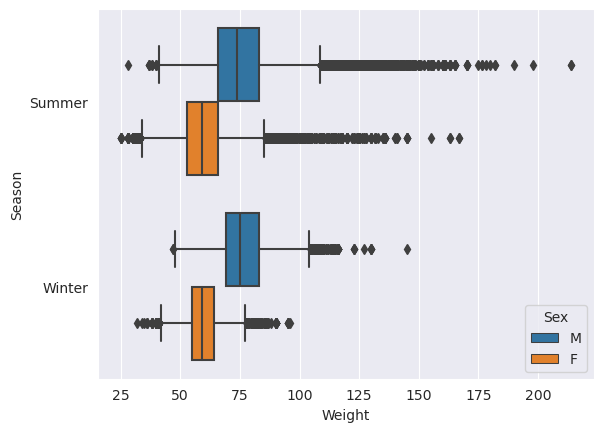

In [61]:
sns.boxplot(x = data['Weight'], y = data['Season'], hue = data['Sex']);

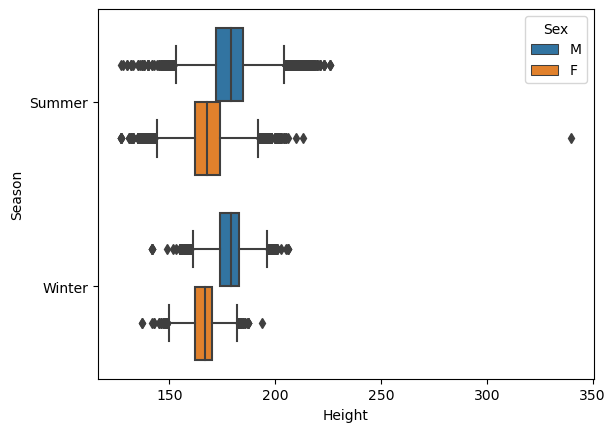

In [176]:
sns.boxplot(x = data['Height'], y = data['Season'], hue = data['Sex']);

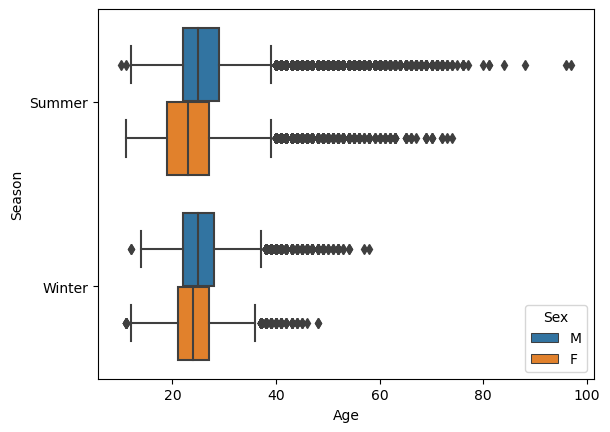

In [175]:
sns.boxplot(x = data['Age'], y = data['Season'], hue = data['Sex']);

### 15

Переменная Team 'вложена' в Переменную NOC, чтобы посмотреть является ли она какой-то доминирующей можно посмотреть как в пределах одной NOC какая из команд больше выигрывала медалей.

In [207]:
print(f"{len(set(data.Team))} уникальных значения переменной Team")

1175 уникальных значения переменной Team


Переведем медали по из качественной в количественную переменную

In [65]:
def translate_to_digit(row):
    if row == 'Bronze':
        return 5
    elif row == "Gold":
        return 15
    elif row == "Silver":
        return 10
    if math.isnan(row):
        return 0

In [66]:
data["Medal"] = data.Medal.map(lambda x: translate_to_digit(x))

Понятно что та команда которая больше выступала имела больше шансов выигрывать  медали, но если нормировать на кол-во выступлений, можно посчитать истинную успешность выступлений.
Например: КомандаA ыступала 5 раз, и выиграла 2 золотых и 1 серебряную медаль = ее общее кол-во очков: 2*15 + 10 = 40. 40\5 = 8.0 за игру.

In [67]:
def calculate_perfomance_team(NOC):
    idx1 = data['NOC'] == NOC
    quantity_perfomance = data.loc[idx1, "Team"].value_counts().to_dict()
    statistics_medal_per_team = {}
    for team in set(data.loc[idx1, "Team"]):
        idx = (data['Team'] == team) & (data['NOC'] == NOC)
        sum_medal_per_team = data.loc[idx, "Medal"].sum()
        sum_of_perfomance = quantity_perfomance[team]
        statistics_medal_per_team[team] = sum_medal_per_team/sum_of_perfomance
    return statistics_medal_per_team


In [71]:
statistics_medal_per_ned = calculate_perfomance_team("NED")

In [72]:
statistics_medal_per_ger = calculate_perfomance_team("GER")

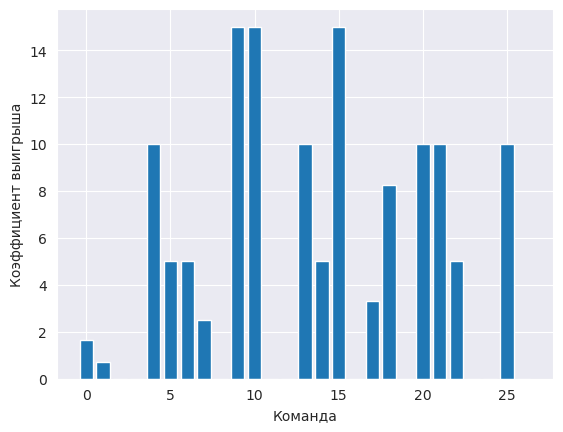

In [73]:

fig, ax = plt.subplots()
ax.bar(range(len(statistics_medal_per_ned)), list(statistics_medal_per_ned.values()), align='center');
ax.set_xlabel("Команда")
ax.set_ylabel("Коэффициент выигрыша")
plt.show();

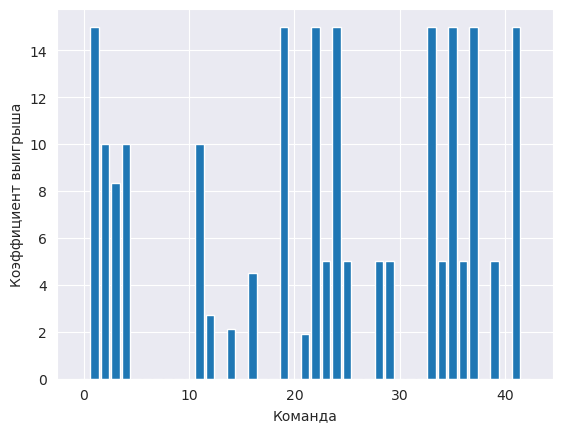

In [74]:

fig, ax = plt.subplots()
ax.bar(range(len(statistics_medal_per_ger)), list(statistics_medal_per_ger.values()), align='center');
ax.set_xlabel("Команда")
ax.set_ylabel("Коэффициент выигрыша")
plt.show();

Видно -  не все команды одинаково хорошо выступают, способность побеждать у команд разная.

## 16

In [139]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",15
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,0


Гипотеза H1: Среднее выступлений за 2008 год атлетов из Сша значимо отличается в большую сторону , чем среднее выступлений атлетов  из Германии.
Можно использовать z-тест для сравнения двух выборок. Выборка нормально распределена (размер выборки больше 30) и известна дисперия генеральной совокупности


![SNOWFALL](photo_2022-11-24_14-18-39.jpg)

In [117]:
data.Medal

0         0
1         0
2         0
3        15
4         0
         ..
22582     0
22583     0
22584     0
22585     0
22586     0
Name: Medal, Length: 271081, dtype: int64

In [118]:
population_usa = data[(data['Sport'] == 'Athletics') & (data['NOC'] == 'USA') & (data['Year'] == 2008)]

In [119]:
population_ger = data[(data['Sport'] == 'Athletics') & (data['NOC'] == 'GER') & (data['Year'] == 2008)]

ПОсчитааем станадртные отклонения в генеральных совокупностях, ведь мы их знаем

In [122]:
sd_ger = population_ger["Medal"].std()
sd_usa = population_usa["Medal"].std()

In [123]:
import math

Сгенерируем случайные выборки (n = 40) из обоих ген совокупностей

In [140]:
np.random.seed(42)

In [124]:
idx_ger = np.random.choice(population_ger.index, 40)
idx_usa = np.random.choice(population_usa.index, 40)

In [127]:
sample_ger = population_ger.loc[idx_ger, :]
sample_usa = population_usa.loc[idx_usa, :]

In [130]:
mean_ger = sample_ger["Medal"].mean()
mean_usa = sample_usa["Medal"].mean()

Считаем z-статистику

In [137]:
Z = (mean_usa - mean_ger)/(((sd_usa ** 2) / 40 + (sd_ger ** 2) / 40) ** 0.5)

In [220]:
if Z >= abs(scipy.stats.norm.ppf(0.05)):
    print("Различие стат значимо")

Различие стат значимо


для alpha 0.05 -> Z >= 1.645

Можно сказать что среднее выступлений атлетов из Америки стат значимо больше чем среднее выступлений спортсменов из Германии.

Тест №2
Сейчас я хочу рассмотреть доверительный интервал разности средних двух выборок, зная стандартные отклонения их генеральных совокупностей.
Каждая выборка имеет нормальное распределение.
Выборки независимы и случайно распределены.
Найду 99 процентный доверит интервал, разности выступлений двух сборных команд США по плаванию за разные года.


![SNOWFALL](photo_2022-11-24_14-11-55.jpg)

analyze_ds.ipynb  photo_2022-11-24_14-11-55.jpg


In [150]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,124517,William Van Dijck,M,23.0,185.0,65.0,Belgium,BEL,1984 Summer,1984.0,Summer,Los Angeles,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
1,124517,William Van Dijck,M,27.0,185.0,65.0,Belgium,BEL,1988 Summer,1988.0,Summer,Seoul,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
2,124517,William Van Dijck,M,31.0,185.0,65.0,Belgium,BEL,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Men's 3,000 metres Steeplechase",0
3,124518,"Daniel ""Daan"" van Dijk",M,21.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Cycling,"Cycling Men's Tandem Sprint, 2,000 metres",15
4,124519,"Everdina ""Edith"" van Dijk",F,35.0,176.0,66.0,Netherlands,NED,2008 Summer,2008.0,Summer,Beijing,Swimming,Swimming Women's 10 kilometres Open Water,0


In [160]:
idx_2000 = (data["Sport"] == "Swimming") & (data["NOC"] == "USA") & (data["Year"] == 2000)
idx_2004 = (data["Sport"] == "Swimming") & (data["NOC"] == "USA") & (data["Year"] == 2004)

Получим генеральные совокупности

In [161]:
population_2000 = data.loc[idx_2000, :]
population_2004 = data.loc[idx_2004, :]

Получим стандартные отклонения из генеральных совокупностей

In [198]:
std_2000 = population_2000["Medal"].std()
std_2004 = population_2004["Medal"].std()

Получим random sample

In [199]:
idx_2000 = np.random.choice(population_2000.index, 50)
idx_2004 = np.random.choice(population_2004.index, 50)
sample_2000 = population_2000.loc[idx_2000, :]
sample_2004 = population_2004.loc[idx_2004, :]

Вычислим среднее из random sample

In [200]:
avg_2000 = sample_2000["Medal"].mean()
avg_2004 = sample_2004["Medal"].mean()

In [202]:
alpha = 0.01

In [203]:
z_alpha = scipy.stats.norm.ppf(alpha/2)

In [210]:
left_bound = avg_2000 - avg_2004 + z_alpha * (std_2000 ** 2 / 50 + std_2004 ** 2 / 50) ** 0.5

In [211]:
right_bound = avg_2000 - avg_2004 - z_alpha * (std_2000 ** 2 / 50 + std_2004 ** 2 / 50) ** 0.5

In [215]:
print(f"{left_bound} < true_avg_2000 - true_avg_2004 < {right_bound}")

-4.530981215401145 < true_avg_2000 - true_avg_2004 < 1.8839223918717316


In [217]:
left_bound / (left_bound - right_bound)

0.7063210131893735

Можно сделать сделать вывод что в 70 процентах случаев среднее успешности выступлений сборной команды в 2004 году больше чем в 2000